In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import scipy
import time
from scipy.ndimage import gaussian_filter
import imageio

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import scipy
import time
from scipy.ndimage import gaussian_filter
import imageio



In [ ]:

#create a 3D image class
class Image3D():

# Class constructor 
    def _init_(self, image, voxel_dim):
# constructer takes 2 inputs numpy_array representing a 3D image and a tuple of 3 numerical values
# voxel_dims = tuple of voxel dimensions (tuple (dz,dy,dx))
# dz, dx, dy = voxel dimensions
# z, x, y = tuple of arrays represent the c, a and b voxel coordinates 
#image is input image array
        self.image = image
        self.voxel_dim = voxel_dim
# assigning voxel dimensions
        self.dz, self.dy, self.dx = voxel_dim
# to find the image shape. D3, D1 and D2 represent (32,128,128) dimensions of the 3D image
        self.D3, self.D2, self.D1 = image.shape

# getting the voxel coordinates from negative axis to positive with image dimesion as number of intervals
# get the coordinates for interpolation
        self.k = self.dz*np.linspace( -(self.D3-1)/2, (self.D3-1)/2, self.D3)
        self.j = self.dy*np.linspace( -(self.D2-1)/2, (self.D2-1)/2, self.D2)
        self.i = self.dx*np.linspace( -(self.D1-1)/2, (self.D1-1)/2, self.D1)

#x,y,z coordinates vectors
# Create meshgrid of coordinate matrices from coordinate vectors.
        self.z, self.y, self.x = np.meshgrid(self.k, self.j, self.i, indexing = 'ij')


#create a volume resize function with one input of resize ratio which is tuple of 3 elements  
    def volume_resize(self, resize_ratio, display = True, identifier = ''):
#resize ratio tuple of 3 elements       
        r3, r2, r1 = resize_ratio
#getting the new image shape. Multiply resize ratio by image shape to create new shape
#r_D3, r_D1, r_D2 gives new image dimensions
        r_D3, r_D2, r_D1 = round(self.D3*r3), round(self.D2*r2), round(self.D1*r1)
        
#r_dz, r_dx, r_dy are new voxel dimensions
        r_dz, r_dy, r_dx = self.dz*(self.D3/r_D3), self.dy*(self.D2/r_D2), self.dx*(self.D1/r_D1)
        r_voxel_dim=(r_dz, r_dy, r_dx)

#resize-coordinates for interpolation
        r_k = r_dz*np.linspace(-(r_D3-1)/2, (r_D3-1)/2, r_D3)
        r_j = r_dy*np.linspace(-(r_D2-1)/2, (r_D2-1)/2, r_D2)
        r_i = r_dx*np.linspace(-(r_D1-1)/2, (r_D1-1)/2, r_D1)
        
#resize voxel coordinates        
        r_z, r_y, r_x = np.meshgrid(r_k, r_j, r_i, indexing='ij')
        r_vox_coordinates = r_z, r_y, r_x

#using interpn function to get the interpolated image        
        interpolated_image=interpolate.interpn((self.k, self.j, self.i), self.image, (r_z,r_y,r_x), method='linear', bounds_error = False, fill_value = 0)
                
        return interpolated_image, r_voxel_dim, r_vox_coordinates
#create a volume resize function with one input of resize ratio which is tuple of 3 elements
  
    def volume_resize_antialias(self, resize_ratio, sigma, display = True, identifier = ''):
#sigma minimum diviation
#filter the image with Gaussian filter
        filtered_image = gaussian_filter(self.image, sigma=sigma)

#resize ratio tuple of 3 elements           
        r3, r2, r1 = resize_ratio

#resize-coordinates for interpolation. multiply resize ratio by image shape to create new shape
#r_D3, r_D1, r_D2 gives new image dimensions
        r_D3, r_D2, r_D1 = round(self.D3*r3), round(self.D2*r2), round(self.D1*r1)

#r_dz, r_dx, r_dy are new voxel dimensions
        r_dz, r_dy, r_dx = self.dz*(self.D3/r_D3), self.dy*(self.D2/r_D2), self.dx*(self.D1/r_D1)
        r_voxel_dim=(r_dz, r_dy, r_dx)

#resize-coordinates for interpolation
        r_k = r_dz*np.linspace(-(r_D3-1)/2, (r_D3-1)/2, r_D3)
        r_j = r_dy*np.linspace(-(r_D2-1)/2, (r_D2-1)/2, r_D2)
        r_i = r_dx*np.linspace(-(r_D1-1)/2, (r_D1-1)/2, r_D1)

#resize voxel coordinates        
        r_z, r_y, r_x = np.meshgrid(r_k, r_j, r_i, indexing='ij')
        r_vox_coordinates = r_z, r_y, r_x

#using interpn function to get the interpolated image        
        interpolated_image=interpolate.interpn((self.k, self.j, self.i), filtered_image, (r_z, r_y, r_x), method='linear', bounds_error = False, fill_value = 0)
        
        return interpolated_image, r_voxel_dim, r_vox_coordinates

In [2]:
image = np.load("image_train00.npy")
voxel_dim = (2, 0.5, 0.5)
# assigning voxel dimensions
dz, dy, dx = voxel_dim
# to find the image shape. D3, D1 and D2 represent (32,128,128) dimensions of the 3D image
D3, D2, D1 = image.shape


# getting the voxel coordinates from negative axis to positive with image dimesion as number of intervals
# get the coordinates for interpolation
k = dz*np.linspace( -(D3-1)/2, (D3-1)/2, D3)
j = dy*np.linspace( -(D2-1)/2, (D2-1)/2, D2)
i = dx*np.linspace( -(D1-1)/2, (D1-1)/2, D1)

# Er
k = dz*np.linspace(0, (D3-1), D3)
j = dy*np.linspace(0, (D2-1), D2)
i = dx*np.linspace(0, (D1-1), D1)


In [34]:
dy*np.linspace(0, D2-1, D2)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
       55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ,
       60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5])

In [36]:
k

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
       52., 54., 56., 58., 60., 62.])

In [37]:
j

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
       55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ,
       60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5])

In [38]:
i

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
       55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ,
       60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5])

In [3]:

#x,y,z coordinates vectors
# Create meshgrid of coordinate matrices from coordinate vectors.
z, y,x = np.meshgrid(k, j, i, indexing = 'ij')



In [4]:
# Desired final isotropic voxel dimension
final_voxel_dimension = (0.3)

# Compute the resize ratio
resize_ratio = final_voxel_dimension / np.array(voxel_dim)
resize_ratio

array([0.15, 0.6 , 0.6 ])

In [7]:
r3, r2, r1 = resize_ratio
#getting the new image shape. Multiply resize ratio by image shape to create new shape
#r_D3, r_D1, r_D2 gives new image dimensions
r_D3, r_D2, r_D1 = round(D3*r3), round(D2*r2), round(D1*r1)
print(r_D3, r_D2, r_D1)

5 77 77


In [71]:
        
#r_dz, r_dx, r_dy are new voxel dimensions
r_dz, r_dy, r_dx = dz*(D3/r_D3), dy*(D2/r_D2), dx*(D1/r_D1)
r_voxel_dim=(r_dz, r_dy, r_dx)
print(r_voxel_dim)


(12.8, 0.8311688311688312, 0.8311688311688312)


In [10]:
dz/0.15

13.333333333333334

In [72]:
#resize-coordinates for interpolation
r_k = r_dz*np.linspace(-(r_D3-1)/2, (r_D3-1)/2, r_D3)
r_j = r_dy*np.linspace(-(r_D2-1)/2, (r_D2-1)/2, r_D2)
r_i = r_dx*np.linspace(-(r_D1-1)/2, (r_D1-1)/2, r_D1)

#Er
r_k = r_dz*np.linspace(0, (r_D3-1), r_D3)
r_j = r_dy*np.linspace(0, (r_D2-1), r_D2)
r_i = r_dx*np.linspace(0, (r_D1-1), r_D1)
 

In [53]:
np.linspace(0, (r_D2-1), r_D2)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [73]:
#resize voxel coordinates        
r_z, r_y, r_x = np.meshgrid(r_k, r_j, r_i, indexing='ij')
r_z

r_vox_coordinates = r_z, r_y, r_x

r_vox_coordinates


(array([[[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
         [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
         [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
         ...,
         [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
         [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
         [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]],
 
        [[12.8, 12.8, 12.8, ..., 12.8, 12.8, 12.8],
         [12.8, 12.8, 12.8, ..., 12.8, 12.8, 12.8],
         [12.8, 12.8, 12.8, ..., 12.8, 12.8, 12.8],
         ...,
         [12.8, 12.8, 12.8, ..., 12.8, 12.8, 12.8],
         [12.8, 12.8, 12.8, ..., 12.8, 12.8, 12.8],
         [12.8, 12.8, 12.8, ..., 12.8, 12.8, 12.8]],
 
        [[25.6, 25.6, 25.6, ..., 25.6, 25.6, 25.6],
         [25.6, 25.6, 25.6, ..., 25.6, 25.6, 25.6],
         [25.6, 25.6, 25.6, ..., 25.6, 25.6, 25.6],
         ...,
         [25.6, 25.6, 25.6, ..., 25.6, 25.6, 25.6],
         [25.6, 25.6, 25.6, ..., 25.6, 25.6, 25.6],
         [25.6, 25.6, 25.6, ..., 25.6, 25.6, 25.6]],
 
        [[38.

In [74]:

#using interpn function to get the interpolated image        
interpolated_image=interpolate.interpn((k, j, i), image, (r_z,r_y,r_x), method='linear', bounds_error = False, fill_value = 0)

In [75]:
interpolated_image.shape

(5, 77, 77)

Text(0.5, 1.0, 'Filtered')

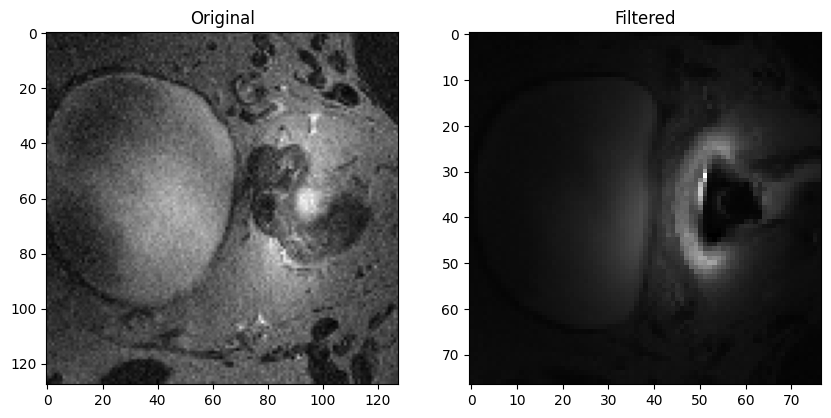

Bad pipe message: %s [b'@\xba\xa7/\x81\xa7\xda\x86\x07\xd2v\x86\x82d^\xd2\xa2; \x9a\x9b\xe0t\xc5~3[\x04\xc7\x0f>A{i\xd8\xea\x89\xbee\xe5\xa7"\xa5\xf7\xabh+\xb8\xb2\xbe\x96\x00\x08\x13\x02\x13\x03', b'\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127', b'.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"\xd1\xa5D\xb2u\xb8'p\x06\xf7\xa7$\xda\x13\xc1\xa1\xd8F\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00:\x00\x89\xc0\x0f\xc0\x05\x005\x00\x84\xc0\x13\xc0\t\x003\x002\x001\x000\x00\x9a\x00\x99\x00"]
Bad pipe message: %s [b'\xa5\xf5\xb1\x8d\xc7f\x06\xd18<\xfe\x8e\xabO!(\x0bq \xf6\x07\xb7\xd8I l\xc8\xa7\x99#UX\xad\xd0\xd1\xcd\xb2\xe3&\x8a\n\xf0o>\xa8\xd4\xcd\x86c\xf3\xb8\x00\x

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image.T[:,:,31], cmap='gray')
ax1.set_title('Original')
ax2.imshow(interpolated_image.T[:,:,4], cmap='gray')
ax2.set_title('Filtered')